In [2]:
from voronoi.fortune import Voronoi
import import_ipynb
from delaunay import voronoi, delaunay
import numpy as np
from voronoi.utils import generate_uniform_points
import time
import os
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
TEST_SPEC = [(-1, 1, 5), (-1, 1, 10), (-1, 1, 20), (-1, 1, 35), (-1, 1, 50), (-1, 1, 75), (-1, 1, 100),
             (-5, 5, 150), (-5, 5, 200), (-5, 5, 300), (-5, 5, 400), (-10, 10, 500), (-20, 20, 1000)]
# (-50, 50, 1500), (-50, 50, 2000), (-50, 50, 3000), (-50, 50, 3500), (-50, 50, 4000), (-50, 50, 4500), (-100, 100, 5000)]
test_folder = 'tests'

In [4]:


def read_test_data(new=False):
    input_data = []
    folder = test_folder + '/in'
    if not os.path.exists(folder):
        os.makedirs(folder)
    for i, d in enumerate(TEST_SPEC):
        # if file of name test{i} exists, read it
        try:
            if new:
                raise Exception
            with open(f"{folder}/test{i}.in", "r") as f:
                lines = f.readlines()
                # Get the number of points from the first line
                num_points = int(lines[0])
                points = np.array([tuple(map(float, line.split()))
                                  for line in lines[1:]])
                input_data.append(points)
        except:
            with open(f"{folder}/test{i}.in", "w") as f:
                points = generate_uniform_points(*d)
                num_points = len(points)  # Get the number of points
                # Write the number of points at the start of the file
                f.write(f"{num_points}\n")
                f.write("\n".join([" ".join(map(str, p)) for p in points]))
                input_data.append(points)
    return input_data

In [5]:
def runTests(saveOutput=True, tested=['fortune', 'delaunay']):
    test_data = read_test_data()
    times = {}
    # tests_n = 5
    tests_n = len(test_data)
    fortune = Voronoi()
    for method in tested:
        if not os.path.exists(f"{test_folder}/out/{method}"):
            os.makedirs(f"{test_folder}/out/{method}")
    for i in range(tests_n):
        points = test_data[i]
        for method in tested:
            print(f"Testing {method}, test #{i}, n={len(points)}...")
            start = time.time()
            if method == 'fortune':
                res = fortune.get_voronoi(points)
            elif method == 'delaunay':
                triang = delaunay(points)
                res = voronoi(triang, points)
            times[(i, method)] = time.time() - start
            print(f"Time elapsed: {times[(i, method)]}")
            if saveOutput:
                with open(f"{test_folder}/out/{method}/test{i}.out", "w") as f:
                    f.write("\n".join([" ".join(map(str, p)) for p in res]))
    return times

In [6]:
def saveAndVisualize(new=True):
    if not new:
        df = pd.read_csv(f'{test_folder}/times.csv')
        n = df['n'].tolist()
        fortune = df['Fortune [s]'].tolist()
        delaunay = df['Delaunay [s]'].tolist()
    else:
        times = runTests()
        fortune = [times[(i, 'fortune')]
                   for i, method in times if method == 'fortune']
        delaunay = [times[(i, 'delaunay')]
                    for i, method in times if method == 'delaunay']
        n = [TEST_SPEC[i][2] for i in range(len(delaunay))]

    data = []
    for i in range(len(n)):
        data.append([n[i], fortune[i], delaunay[i]])

    df = pd.DataFrame(
        data, columns=['n', 'Fortune [s]', 'Delaunay [s]'])
    df.plot(x='n', y=['Fortune [s]',
            'Delaunay [s]'], kind='line')
    if new:
        df.to_csv(f'{test_folder}/times.csv')
    return df

,n,Fortune [s],Delaunay [s]
0,5,0.036906,0.002403
1,10,0.132327,0.005481
2,20,0.414973,0.011526
3,35,1.087484,0.026529
4,50,2.188971,0.035391
5,75,4.136819,0.052121
6,100,5.219724,0.086582
7,150,12.179796,0.118787
8,200,15.714083,0.175474
9,300,26.462209,0.270817


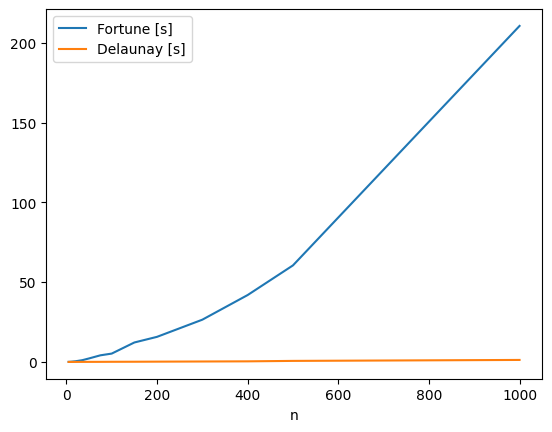

In [7]:
df = saveAndVisualize(False)
df